In [ ]:
import pandas as pd
import numpy as np

# **Import Data**

In [ ]:
!git clone -l -s git://github.com/AshraqatM/NLP_clustering.git cloned-repo
%cd cloned-repo
!ls

fatal: destination path 'cloned-repo' already exists and is not an empty directory.
/content/cloned-repo
oversampling_dataset.csv


In [ ]:
df = pd.read_csv("oversampling_dataset.csv")
df.head()
df['category'].value_counts()

discredit                         2654
sexual harassment                 2654
dominance                         2654
damning                           2654
derailing                         2654
none                              2654
stereotyping & objectification    2654
threat of violence                2654
Name: category, dtype: int64

In [ ]:
#Main
labels = ['damning', 'derailing', 'discredit', 'dominance' , 'sexual harassment' , 'stereotyping & objectification' , 'threat of violence', 'none']

# **Classification**

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#SVM model
def svm(x,y):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123,shuffle=True,stratify=y)                                            
  clf = SVC()
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  conf_mat = confusion_matrix(y_test, y_pred,labels)
  acc= accuracy_score(y_test,y_pred)
  print("Accuracy of the model: ", acc)
  print("\nClassification Report: ")
  print(classification_report(y_test,y_pred))
  conf_mat_plot(conf_mat,"SVM")
  


#k-neighbor model
def kneighbor(x,y):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=12)
  clf = DecisionTreeClassifier()
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  acc= accuracy_score(y_test,y_pred)
  conf_mat = confusion_matrix(y_test, y_pred,labels)
  print("Accuracy of the model: ", acc)
  print("\nClassification Report: ")
  print(classification_report(y_test,y_pred))
  conf_mat_plot(conf_mat,"K-Nearest Neighbors")

#Decision tree model
def tree(x,y):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)
  clf = KNeighborsClassifier(n_neighbors=4)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  conf_mat = confusion_matrix(y_test, y_pred,labels)
  acc= accuracy_score(y_test,y_pred)
  print("Accuracy of the model: ", acc)
  print("\nClassification Report: ")
  print(classification_report(y_test,y_pred))
  conf_mat_plot(conf_mat,"Decision Tree")

In [ ]:
#plot confusion matrix

def conf_mat_plot(conf_mat, model):
  plt.figure(1, figsize=(12, 9))
  plt.title('Confusion matrix of ' + model)
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  ax = sns.heatmap(conf_mat, annot=True,cmap="YlGnBu", fmt= 'd')
  mat_labels = ['damning', 'derailing', 'discredit', 'dominance' , 'sexual har.' , 'stereotyp.' , 'threat.', 'None']
  ax.set_xticklabels(mat_labels)
  ax.set_yticklabels(mat_labels)
  plt.show()

# **Feature Engineering Using Bag of Words**

**Using Normal Tokenization**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range = (1,1))
text_counts_1= cv.fit_transform(df['text_normal_tokens'])

Accuracy of the model:  0.960596546310832

Classification Report: 
                                precision    recall  f1-score   support

                       damning       0.99      0.99      0.99       796
                     derailing       1.00      1.00      1.00       796
                     discredit       0.96      0.74      0.84       796
                     dominance       1.00      1.00      1.00       796
                          none       0.79      0.98      0.87       796
             sexual harassment       1.00      1.00      1.00       797
stereotyping & objectification       0.99      0.98      0.99       797
            threat of violence       1.00      0.99      1.00       796

                      accuracy                           0.96      6370
                     macro avg       0.97      0.96      0.96      6370
                  weighted avg       0.97      0.96      0.96      6370



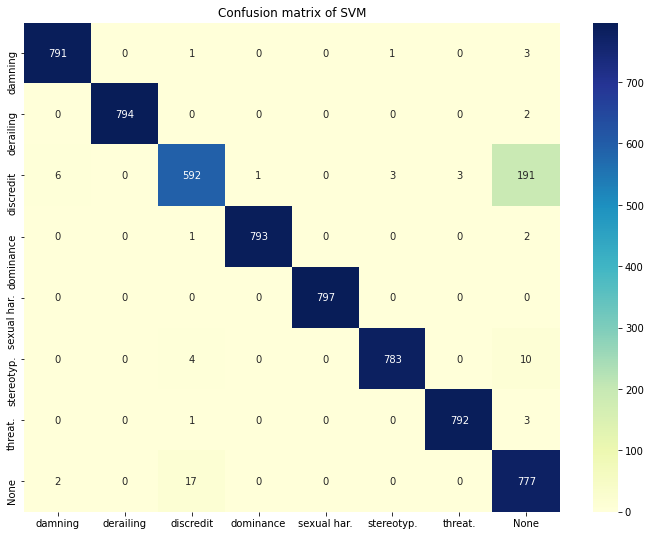

In [ ]:
svm(text_counts_1,df['category'])

Accuracy of the model:  0.9472527472527472

Classification Report: 
                                precision    recall  f1-score   support

                       damning       0.97      0.98      0.98       791
                     derailing       0.99      0.99      0.99       780
                     discredit       0.89      0.78      0.83       784
                     dominance       0.98      0.99      0.99       791
                          none       0.80      0.88      0.84       828
             sexual harassment       1.00      1.00      1.00       835
stereotyping & objectification       0.98      0.97      0.97       770
            threat of violence       0.97      0.98      0.98       791

                      accuracy                           0.95      6370
                     macro avg       0.95      0.95      0.95      6370
                  weighted avg       0.95      0.95      0.95      6370



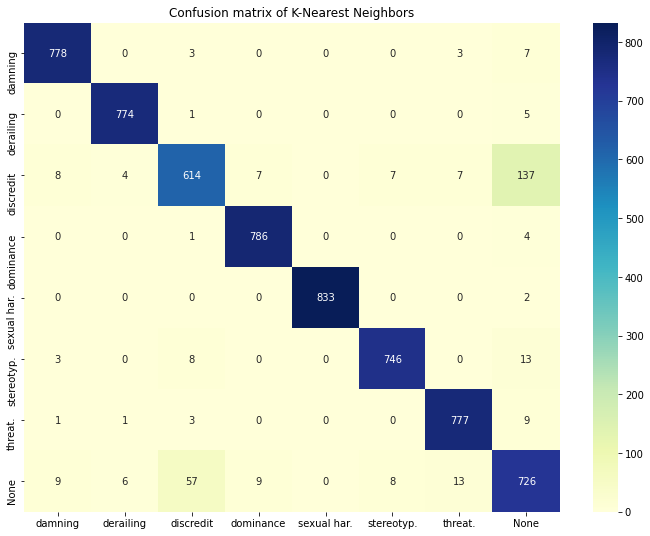

In [ ]:
kneighbor(text_counts_1,df['category'])

Accuracy of the model:  0.9150706436420722

Classification Report: 
                                precision    recall  f1-score   support

                       damning       0.97      1.00      0.98       799
                     derailing       1.00      1.00      1.00       764
                     discredit       0.63      0.88      0.73       829
                     dominance       1.00      1.00      1.00       821
                          none       0.83      0.47      0.60       778
             sexual harassment       1.00      1.00      1.00       795
stereotyping & objectification       0.99      0.98      0.98       789
            threat of violence       0.99      0.99      0.99       795

                      accuracy                           0.92      6370
                     macro avg       0.93      0.91      0.91      6370
                  weighted avg       0.92      0.92      0.91      6370



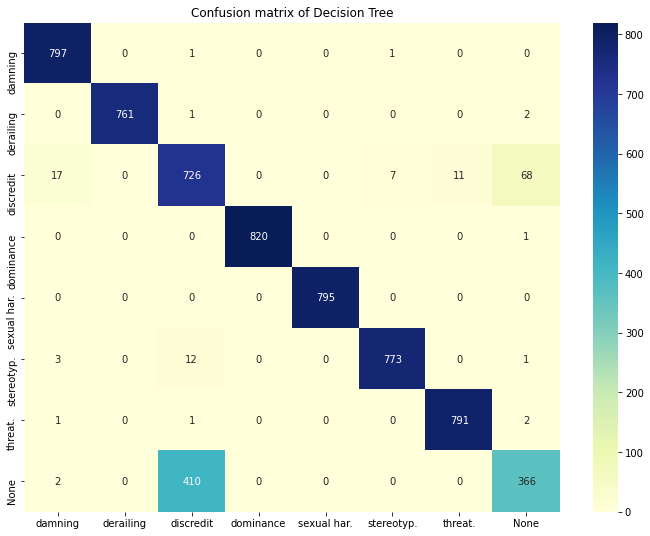

In [ ]:
tree(text_counts_1,df['category'])

**Using Farasa Tokenization**

In [ ]:
text_counts_2= cv.fit_transform(df['text_farasa_tokens'])

Accuracy of the model:  0.9623233908948194

Classification Report: 
                                precision    recall  f1-score   support

                       damning       0.99      0.99      0.99       796
                     derailing       1.00      1.00      1.00       796
                     discredit       0.94      0.78      0.85       796
                     dominance       1.00      1.00      1.00       796
                          none       0.81      0.97      0.88       796
             sexual harassment       1.00      1.00      1.00       797
stereotyping & objectification       0.99      0.98      0.98       797
            threat of violence       1.00      0.99      1.00       796

                      accuracy                           0.96      6370
                     macro avg       0.97      0.96      0.96      6370
                  weighted avg       0.97      0.96      0.96      6370



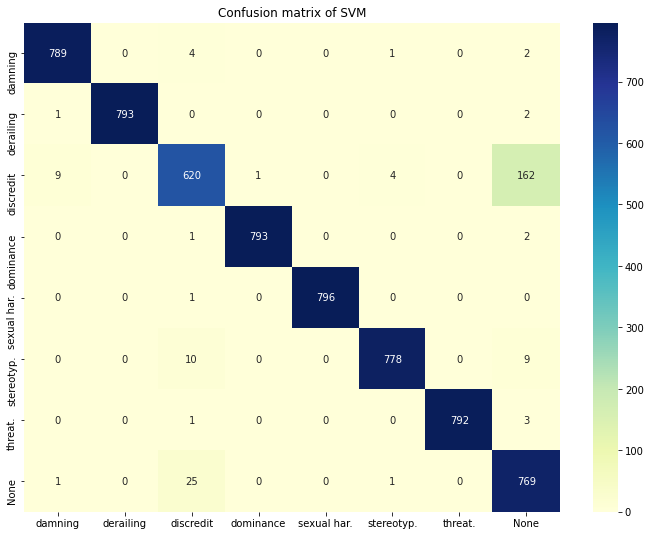

In [ ]:
svm(text_counts_2,df['category'])

Accuracy of the model:  0.9343799058084772

Classification Report: 
                                precision    recall  f1-score   support

                       damning       0.97      0.98      0.98       791
                     derailing       0.98      0.99      0.99       780
                     discredit       0.84      0.73      0.79       784
                     dominance       0.98      0.99      0.99       791
                          none       0.78      0.82      0.80       828
             sexual harassment       1.00      1.00      1.00       835
stereotyping & objectification       0.96      0.98      0.97       770
            threat of violence       0.95      0.98      0.97       791

                      accuracy                           0.93      6370
                     macro avg       0.93      0.93      0.93      6370
                  weighted avg       0.93      0.93      0.93      6370



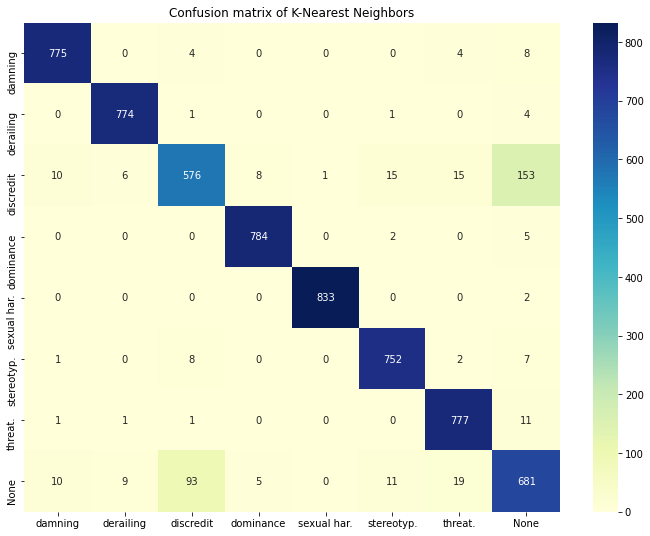

In [ ]:
kneighbor(text_counts_2,df['category'])

Accuracy of the model:  0.9189952904238619

Classification Report: 
                                precision    recall  f1-score   support

                       damning       0.97      1.00      0.98       799
                     derailing       0.99      1.00      1.00       764
                     discredit       0.67      0.82      0.74       829
                     dominance       0.99      1.00      1.00       821
                          none       0.79      0.57      0.66       778
             sexual harassment       1.00      1.00      1.00       795
stereotyping & objectification       0.98      0.97      0.98       789
            threat of violence       0.99      0.99      0.99       795

                      accuracy                           0.92      6370
                     macro avg       0.92      0.92      0.92      6370
                  weighted avg       0.92      0.92      0.92      6370



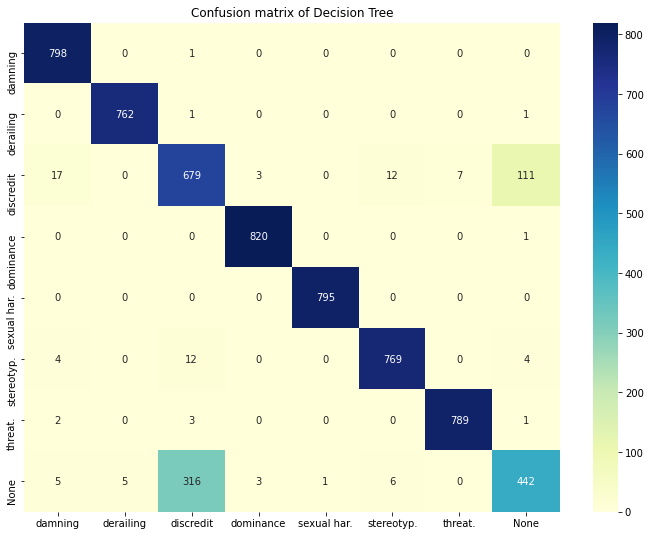

In [ ]:
tree(text_counts_2,df['category'])

# **Feature Engineering Using TF_IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['text_normal_tokens'])

Accuracy of the model:  0.967032967032967

Classification Report: 
                                precision    recall  f1-score   support

                       damning       0.99      1.00      1.00       796
                     derailing       1.00      1.00      1.00       796
                     discredit       0.97      0.77      0.86       796
                     dominance       1.00      1.00      1.00       796
                          none       0.81      0.98      0.89       796
             sexual harassment       1.00      1.00      1.00       797
stereotyping & objectification       1.00      0.99      0.99       797
            threat of violence       1.00      1.00      1.00       796

                      accuracy                           0.97      6370
                     macro avg       0.97      0.97      0.97      6370
                  weighted avg       0.97      0.97      0.97      6370



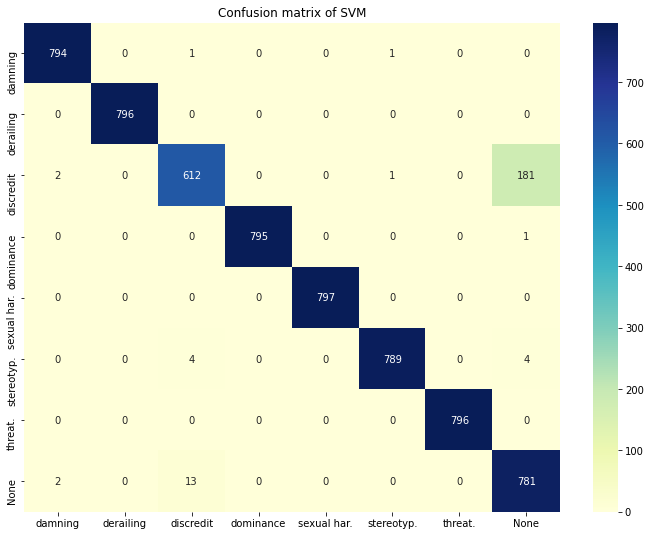

In [ ]:
svm(text_tf,df['category'])

Accuracy of the model:  0.9379905808477237

Classification Report: 
                                precision    recall  f1-score   support

                       damning       0.98      0.98      0.98       791
                     derailing       0.97      0.99      0.98       780
                     discredit       0.87      0.74      0.80       784
                     dominance       0.98      0.99      0.99       791
                          none       0.79      0.85      0.82       828
             sexual harassment       1.00      1.00      1.00       835
stereotyping & objectification       0.96      0.97      0.97       770
            threat of violence       0.95      0.98      0.97       791

                      accuracy                           0.94      6370
                     macro avg       0.94      0.94      0.94      6370
                  weighted avg       0.94      0.94      0.94      6370



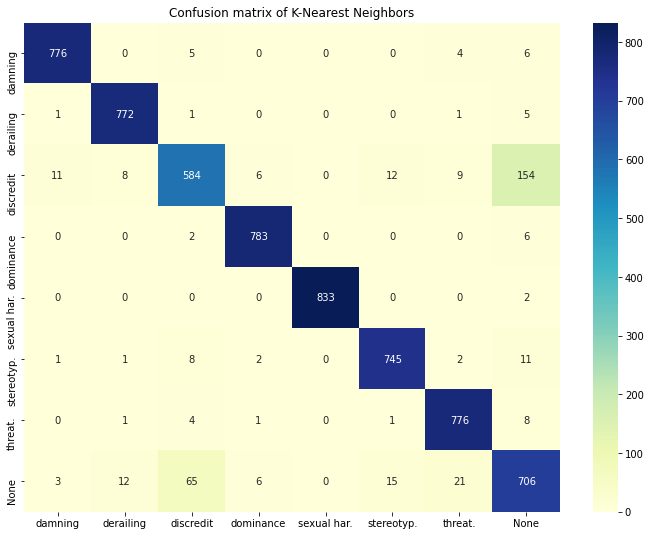

In [ ]:
kneighbor(text_tf,df['category'])

Accuracy of the model:  0.9210361067503925

Classification Report: 
                                precision    recall  f1-score   support

                       damning       0.89      1.00      0.94       799
                     derailing       0.99      1.00      0.99       764
                     discredit       0.73      0.84      0.78       829
                     dominance       0.99      1.00      1.00       821
                          none       0.92      0.53      0.68       778
             sexual harassment       1.00      1.00      1.00       795
stereotyping & objectification       0.93      0.99      0.96       789
            threat of violence       0.96      1.00      0.98       795

                      accuracy                           0.92      6370
                     macro avg       0.93      0.92      0.92      6370
                  weighted avg       0.92      0.92      0.92      6370



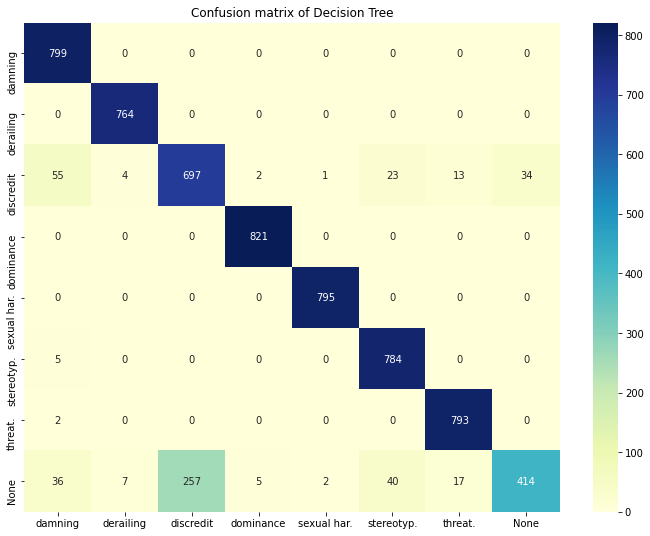

In [ ]:
tree(text_tf,df['category'])